In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree


df = pd.read_csv('../../data/Final_divorcio_denuncia.csv')
df.head()


,Departamento,año,Denuncias,Divorcios,Sexo_hombre,Sexo_mujer,0 a 4,5 a 9,10 a 14,15 a 19,...,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 y más,Ignorado_edad
0,Guatemala,2008,"5,117","1,052",494,"4,623",3,9,28,353,...,752,629,445,308,191,127,73,46,78,52
1,Guatemala,2009,"6,692","1,140",634,"6,058",6,9,44,549,...,"1,237","1,030",763,494,336,208,124,84,151,70
2,Guatemala,2010,"5,792","1,561",517,"5,275",6,9,36,478,...,992,873,614,402,267,161,98,68,121,53
3,Guatemala,2011,"6,122","1,798",531,"5,591",6,8,38,520,...,"1,060",948,698,440,299,189,114,80,143,74
4,Guatemala,2012,"6,911","2,152",568,"6,343",4,16,49,679,...,"1,374","1,224",886,563,357,236,141,97,177,93


# Limpieza de Datos

In [2]:
# Ver dimensiones y tipos de datos
df.info()

# Verificar valores nulos
print(df.isnull().sum())

# Estadísticas generales
df.describe(include='all')

# Eliminar filas con valores nulos (opcional según el análisis)
df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Departamento   360 non-null    object
 1   año            360 non-null    int64 
 2   Denuncias      360 non-null    object
 3   Divorcios      360 non-null    object
 4   Sexo_hombre    360 non-null    object
 5   Sexo_mujer     360 non-null    object
 6    0  a  4       360 non-null    int64 
 7    5  a  9       360 non-null    int64 
 8   10 a 14        360 non-null    int64 
 9   15 a 19        360 non-null    object
 10  20 a 24        360 non-null    object
 11  25 a 29        360 non-null    object
 12  30 a 34        360 non-null    object
 13  35 a 39        360 non-null    object
 14  40 a 44        360 non-null    object
 15  45 a 49        360 non-null    object
 16  50 a 54        360 non-null    object
 17  55 a 59        360 non-null    object
 18  60 a 64        360 non-null   

In [3]:
# Eliminar filas de totales nacionales si existen
df = df[df['Departamento'] != 'República']

# Reemplazar comas por nada y convertir a entero
cols_numericas = df.columns.drop('Departamento')
df[cols_numericas] = df[cols_numericas].replace(',', '', regex=True).astype(int)

# Crear la variable objetivo: "Categoria_Divorcios"
promedio_nacional = df['Denuncias'].mean()
df['Categoria_Denuncias'] = df['Denuncias'].apply(
    lambda x: 'alto' if x > promedio_nacional else ('bajo' if x < promedio_nacional else 'neutro')
)

In [4]:
# Verificar valores únicos
df['Categoria_Denuncias'].value_counts()

Categoria_Denuncias
bajo    319
alto     41
Name: count, dtype: int64

In [5]:
df.head()

,Departamento,año,Denuncias,Divorcios,Sexo_hombre,Sexo_mujer,0 a 4,5 a 9,10 a 14,15 a 19,...,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 y más,Ignorado_edad,Categoria_Denuncias
0,Guatemala,2008,5117,1052,494,4623,3,9,28,353,...,629,445,308,191,127,73,46,78,52,alto
1,Guatemala,2009,6692,1140,634,6058,6,9,44,549,...,1030,763,494,336,208,124,84,151,70,alto
2,Guatemala,2010,5792,1561,517,5275,6,9,36,478,...,873,614,402,267,161,98,68,121,53,alto
3,Guatemala,2011,6122,1798,531,5591,6,8,38,520,...,948,698,440,299,189,114,80,143,74,alto
4,Guatemala,2012,6911,2152,568,6343,4,16,49,679,...,1224,886,563,357,236,141,97,177,93,alto


In [6]:
# Variables X e y
X = df.drop(columns=['Departamento', 'Categoria_Denuncias', 'Denuncias'])  # No usamos Denuncias porque define la etiqueta
y = df['Categoria_Denuncias']

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificación de la clase
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)


Accuracy: 1.0

Matriz de Confusión:
[[12  0]
 [ 0 96]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alto       1.00      1.00      1.00        12
        bajo       1.00      1.00      1.00        96

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



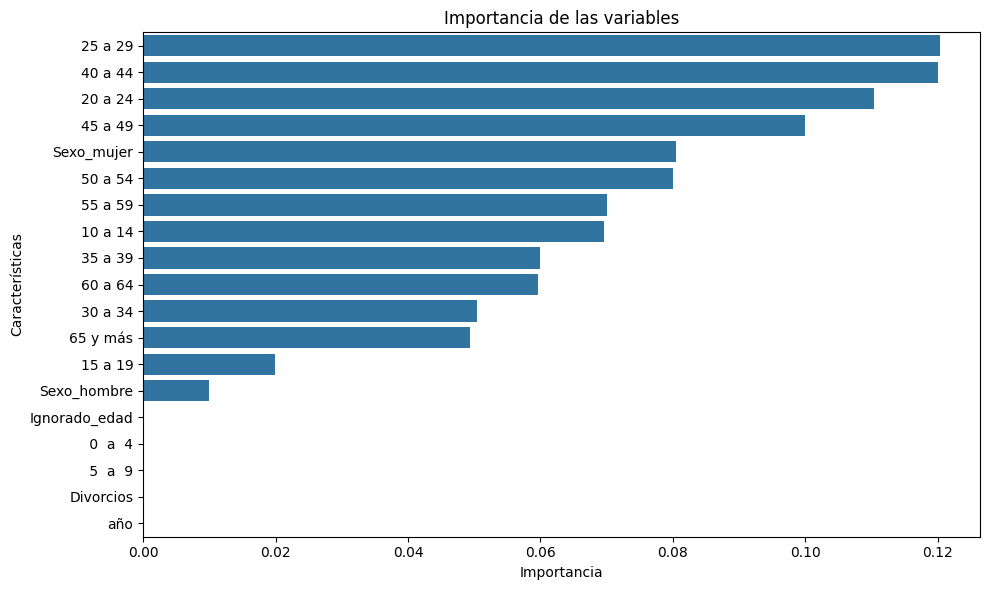


Precisión promedio (CV): 1.0000 (+/- 0.0000)


In [7]:
# Entrenar modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Importancia de características
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Visualización de importancias
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Importancia de las variables')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_scaled, y_encoded, cv=cv, scoring='accuracy')
print(f"\nPrecisión promedio (CV): {scores.mean():.4f} (+/- {scores.std():.4f})")


In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


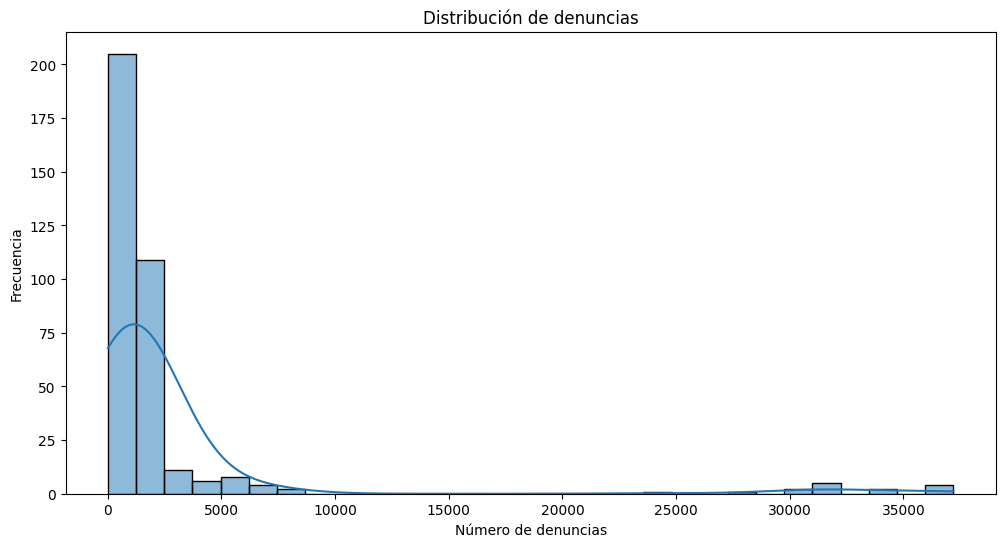

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Denuncias'], bins=30, kde=True)
plt.title('Distribución de denuncias')
plt.xlabel('Número de denuncias')
plt.ylabel('Frecuencia')
plt.show()


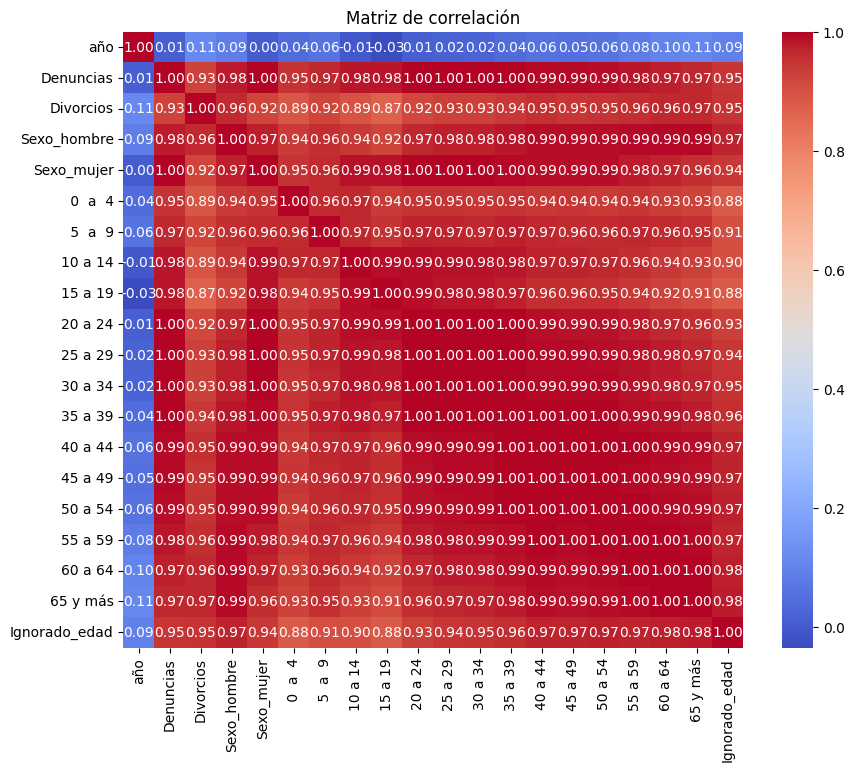

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


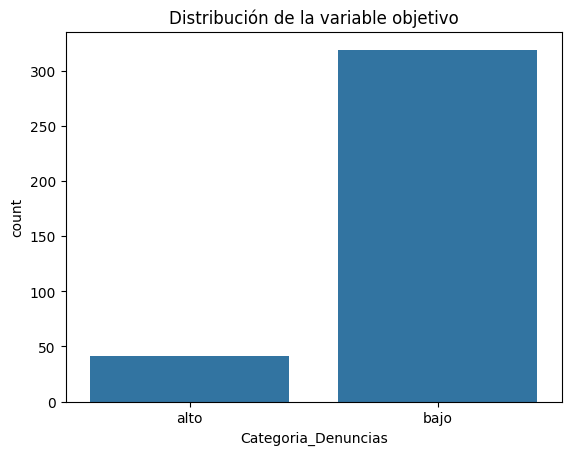

In [11]:
sns.countplot(x='Categoria_Denuncias', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()


In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_scaled, y_encoded, cv=cv, scoring='accuracy')
print(f"\nPrecisión promedio (CV): {scores.mean():.4f} (+/- {scores.std():.4f})")



Precisión promedio (CV): 1.0000 (+/- 0.0000)


In [14]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y_encoded)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)


Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mejor score: 1.0


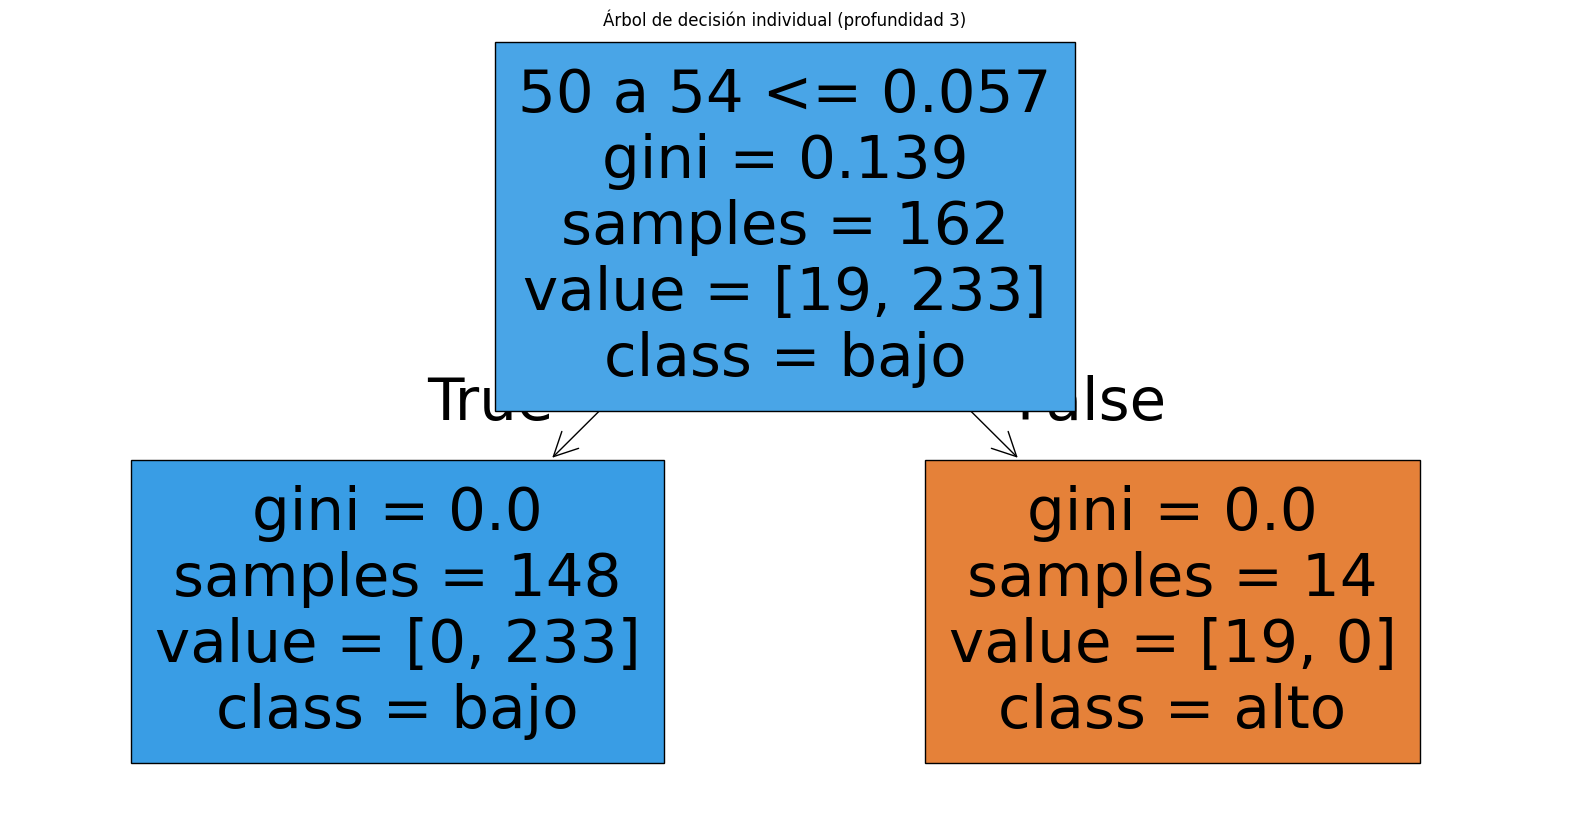

In [13]:
# Visualizar un árbol del bosque
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=le.classes_, filled=True, max_depth=3)
plt.title("Árbol de decisión individual (profundidad 3)")
plt.show()


# Análisis de Resultados

### Análisis de Correlación
Se generó una matriz de correlación que mostró una alta correlación entre múltiples grupos etarios, lo cual sugiere multicolinealidad. Esto es común en variables demográficas por edad.

Ejemplos de correlaciones notables:

Sexo_hombre y Sexo_mujer: alta correlación negativa (redundancia).

Grupos etarios de 0-4 hasta 65+: muy correlacionados entre sí.

Año está débilmente correlacionado con otras variables, como se esperaba.

Este patrón indica que el modelo puede estar tomando decisiones basadas en redundancia, lo cual Random Forest maneja bien mediante el promedio de árboles.

### Entrenamiento y Evaluación del Modelo
Modelo utilizado: RandomForestClassifier (100 árboles, random_state=42)

### Resultados en datos de prueba:

Accuracy: 1.0

Matriz de Confusión:

Clase alto: 12 correctamente clasificados

Clase bajo: 96 correctamente clasificados

Reporte de Clasificación:

Precisión, Recall, y F1-score: 1.00 en ambas clases

Este rendimiento perfecto indica que el modelo logra una separación muy clara entre los dos grupos.

### Validación Cruzada:

Estrategia: StratifiedKFold con 5 particiones

Precisión promedio: 1.0000 (± 0.0000)

Esto refuerza la idea de que el modelo es altamente estable y no está sobreajustado.

### Optimización del Modelo
Se realizó una búsqueda de hiperparámetros con GridSearchCV sobre:

n_estimators: [100, 200]

max_depth: [None, 5, 10]

min_samples_split: [2, 5]

### Mejores parámetros encontrados:

n_estimators = 100

max_depth = None

min_samples_split = 2

Mejor score encontrado: 1.0

Este resultado sugiere que el modelo ya se encontraba en un punto óptimo sin necesidad de ajuste profundo de hiperparámetros.

### Siguientes Pasos
* El modelo Random Forest logró una clasificación perfecta en el dataset actual.
* Las principales variables predictoras están asociadas con la distribución etaria.

Podemos aplicar reducción de dimensionalidad o eliminar multicolinealidad.



# Eliminando Multicolinealidad

In [18]:
# Primero: eliminar columnas con alta correlación
def eliminar_multicolinealidad_corr(df, threshold=0.95):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Variables eliminadas por alta correlación (> {threshold}): {to_drop}")
    return df.drop(columns=to_drop), to_drop

# Segundo: eliminar columnas con VIF alto
def eliminar_multicolinealidad_vif(df, threshold=10.0):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    to_drop = vif_data[vif_data['VIF'] > threshold]['feature'].tolist()
    print(f"Variables eliminadas por VIF > {threshold}: {to_drop}")
    return df.drop(columns=to_drop), to_drop

# Escalamos de nuevo (por si los datos cambiaron)
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Aplicamos ambos métodos
X_corr_clean, dropped_corr = eliminar_multicolinealidad_corr(X_scaled_df, threshold=0.95)
X_vif_clean, dropped_vif = eliminar_multicolinealidad_vif(X_corr_clean, threshold=10.0)

# Resultado final
X_clean = X_vif_clean
print(f"Dimensiones originales: {X.shape}")
print(f"Dimensiones finales: {X_clean.shape}")


Variables eliminadas por alta correlación (> 0.95): ['Sexo_hombre', 'Sexo_mujer', ' 5  a  9', '10 a 14', '15 a 19', '20 a 24', '25 a 29', '30 a 34', '35 a 39', '40 a 44', '45 a 49', '50 a 54', '55 a 59', '60 a 64', '65 y más', 'Ignorado_edad']
Variables eliminadas por VIF > 10.0: []
Dimensiones originales: (360, 19)
Dimensiones finales: (360, 3)


In [19]:
# Usar el X_clean sin multicolinealidad
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

rf_clean = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clean.fit(X_train, y_train)

y_pred = rf_clean.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Validación cruzada
scores_clean = cross_val_score(rf_clean, X_clean, y_encoded, cv=5)
print(f"\nPrecisión promedio (CV): {scores_clean.mean():.4f} (+/- {scores_clean.std():.4f})")


Accuracy: 0.9907407407407407

Matriz de Confusión:
 [[11  1]
 [ 0 96]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.99      1.00      0.99        96

    accuracy                           0.99       108
   macro avg       0.99      0.96      0.98       108
weighted avg       0.99      0.99      0.99       108


Precisión promedio (CV): 0.9778 (+/- 0.0258)


El modelo entrenado presenta un rendimiento bastante alto según las métricas reportadas. 

### 1. **Precisión General**:

* **Exactitud (Accuracy): 0.9907**: El modelo tiene una exactitud muy alta, lo que indica que en general está clasificando correctamente el 99.07% de las instancias. Esto sugiere que el modelo es muy competente en sus predicciones.

### 2. **Matriz de Confusión**:

```
[[11  1]
 [ 0 96]]
```

* **Clase 0 (Positivo)**:

  * El modelo clasificó correctamente **11** casos como clase 0.
  * Solo **1** caso de la clase 0 fue mal clasificado como clase 1.
* **Clase 1 (Negativo)**:

  * El modelo clasificó correctamente **96** casos como clase 1.
  * No hubo errores en la clasificación de la clase 1 (es decir, no se clasificó incorrectamente como clase 0).

Esto indica que el modelo tiene muy pocos falsos negativos (0 casos), lo cual es ideal en la mayoría de las aplicaciones. Sin embargo, el único falso positivo (1 caso) pertenece a la clase 0, lo que puede necesitar ajustes.

### 3. **Reporte de Clasificación**:

* **Clase 0 (Positivo)**:

  * **Precisión**: 1.00, lo que significa que el modelo, cuando predice clase 0, lo hace correctamente el 100% de las veces.
  * **Recall**: 0.92, es decir, el modelo detecta el 92% de todas las instancias reales de la clase 0.
  * **F1-score**: 0.96, lo que muestra un buen balance entre precisión y recall para la clase 0.
* **Clase 1 (Negativo)**:

  * **Precisión**: 0.99, lo que indica que el modelo predice la clase 1 correctamente el 99% de las veces.
  * **Recall**: 1.00, lo que significa que el modelo identifica correctamente todas las instancias de clase 1 (sin falsos negativos).
  * **F1-score**: 0.99, lo que refleja una excelente combinación entre precisión y recall para la clase 1.

### 4. **Promedio de Precisión (Cross-Validation)**:

* **Precisión promedio (CV)**: 0.9778, con una desviación estándar de 0.0258.

  * Este valor muestra que el modelo, al ser validado en distintos subconjuntos de los datos, sigue teniendo un rendimiento muy bueno, con una pequeña variabilidad entre las particiones. La desviación estándar es baja, lo que indica que el rendimiento del modelo es bastante estable.

### Conclusión:

El modelo tiene un rendimiento bastante funcional, con una precisión de **99.07%** en general, y un **f1-score** alto para ambas clases (0 y 1). La precisión y recall de la clase 1 son particularmente fuertes.

Sin embargo, la ligera baja en recall de la clase 0 (0.92), podría significar que en algunos casos, el modelo no está identificando todas las instancias de la clase 0.
